# 교차 검증


하이퍼파라미터 튜닝을 위해서 테스트 데이터를 계속 사용하다보면 모델이 테스트 데이터를 학습하여 마지막 성능 평가할때 일반화 성능을 예측하기 어렵다.(테스트 데이터는 모델에 성능을 평가할 때 한 번만 사용하는 것이 좋음(

따라서 하이퍼 파라미터 튜닝에 사용할 `검증 세트`를 준비하여 사용하는 것이 좋다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 데이터 가져오기
wine = pd.read_csv("https://bit.ly/wine_csv_data")

data = wine[['alcohol','sugar','pH']].to_numpy()
target = wine['class'].to_numpy()

In [ ]:
# 훈련, 검증, 테스트로 데이터 나누기

In [3]:
# 훈련-테스트 데이터 나누기
from sklearn.model_selection import train_test_split

train_input , test_input, train_target, test_target = train_test_split(data,
                                                                      target, test_size = 0.2,
                                                                      random_state = 42)

In [4]:
sub_input, val_input, sub_target, val_target = train_test_split(train_input,
                                                               train_target, test_size = 0.2,
                                                               random_state = 42)

In [8]:
print("원래 훈련 데이터의 개수: ",train_input. shape)
print("훈련셋 <-> 검증세트 분리 후 개수: ", sub_input. shape, val_input.shape)

원래 훈련 데이터의 개수:  (5197, 3)
훈련셋 <-> 검증세트 분리 후 개수:  (4157, 3) (1040, 3)


In [7]:
# 결정 트리

from sklearn.tree import DecisionTreeClassifier

In [8]:
dt = DecisionTreeClassifier()

# 교차 검증

훈련 세트를 충분히 확보하기 어려운 경우 데이터의 특성은 유지하면서 데이터의 양을 늘리는 기법.검증 세트를 조금 떼어 놓으면 검증 점수가 불안정해짐 이럴때 교차검증을 사용하여 안정적인 검증 점수를 얻는다.

* `k-fold 교차 검증`: 훈련세트를 k 부분으로 나눠 교차 검증 수행하여 검증 점수의 평균으로 최종 점수를 냄  

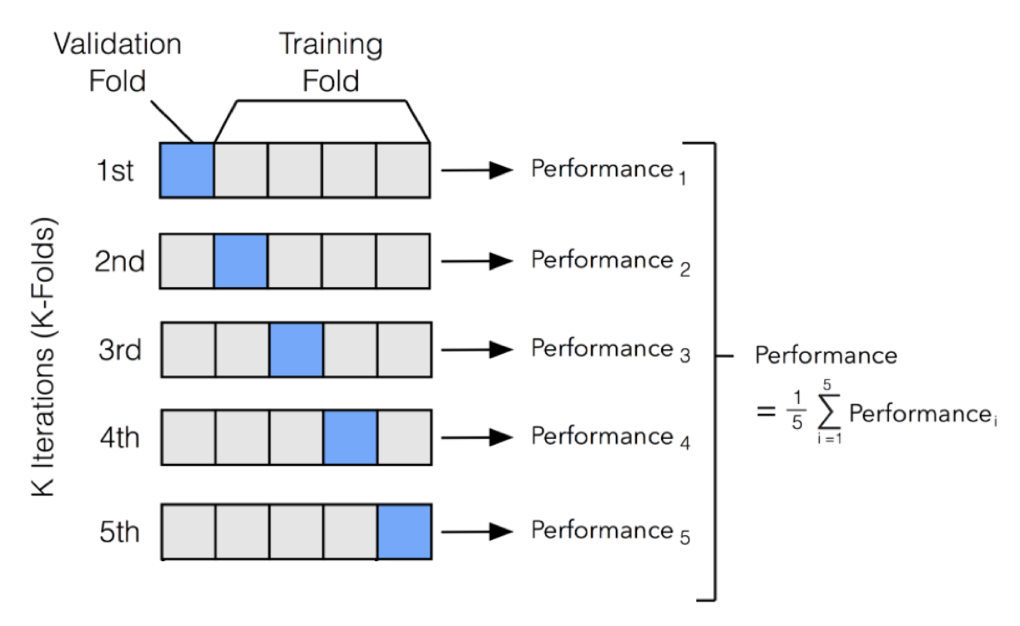

In [5]:
from sklearn.model_selection import cross_validate

In [9]:
# fit_time = 훈련 시간
# score_time = 검증시간
# test_time
# 기본적으로 5겹 폴드 교차 검증이 디폴트 : cross_validate()

scores = cross_validate(dt, train_input, train_target)
print(scores)

{'fit_time': array([0.00919986, 0.0064168 , 0.00498319, 0.00609589, 0.00498343]), 'score_time': array([0.00099635, 0.        , 0.00101399, 0.00099659, 0.00099659]), 'test_score': array([0.86730769, 0.85      , 0.8719923 , 0.85274302, 0.83926853])}


In [18]:
print("교차검증의 최종 점수: ", np.mean(scores['test_score']))

교차검증의 최종 점수:  0.8562623084326646


교차 검증시 훈련 세트 섞기

cross_validate()함수는 자동으로 훈련세트를 섞어 폴드를 나누지 않는다.
따라서 훈련세트를 섞고 싶다면 분할기를 지정해야한다.

In [22]:
from sklearn.model_selection import StratifiedKFold

In [25]:
# 10겹 교차검증/ 훈련세트 섞기


splitter = StratifiedKFold(n_splits = 10, shuffle =True, random_state = 42)
scores = cross_validate(dt, train_input, train_target, cv= splitter)
np.mean(scores['test_score'])

0.8603060619534608

# 하이퍼 파라미터 튜닝

* `모델 파라미터`: 모델이 학습하여 최적값을 찾아내는 파라미터  ex) coef, intercept
* `하이퍼파라미터` : 모델이 학습할 수 없어 사용자가 지정해야하는 파라미터

(+) 사람의 개입없이 하이퍼 파리미터 튜닝을 자동으로 수행하는 기술을 `'AutoML'`이라고 한다.


매개변수의 최적값은 동시에 바꿔가며 최적의 조합을 찾아야한다.하나의 최적을 찾은 뒤 다른 매개변수의 최적을 찾아 각 최적값을 적용하는 것은 사실상 최적값이 아닐 수 있다. 다른 매개변수가 변하면 최적값이 그에 따라 변하기 때문이다.

# 그리드 서치

사이킷런에서 제공하는 하이퍼파라미터 탐색 클래스

교차검증도 수행 가능



In [27]:
from sklearn.model_selection import GridSearchCV

In [29]:
# 최소불순도 = min_impurity_decrease
# 결정 트리의 하이퍼 파라미터

params = {'min_impurity_decrease':[0.0001,0.0002,0.0003,0.0004,0.0005]}

In [31]:
# 5가지의 하이퍼 파라미터 값을 가지고 5겹 교차 검증 시도 = 25개의 모델 훈련
# n_jobs = 병렬실행에 사용할 CPU 코어 수/ -1은 모든 코어 사용 설정/ 기본은 1

gs = GridSearchCV(DecisionTreeClassifier(random_state = 42),params,n_jobs =-1)

In [32]:
# 최적의 파라미터를 찾아 검증 점수가 가장 높은 모델의 매개변수 조합을 전체 훈련 세트에서 자동으로 모델을 훈련해 best_estimator_ 속성에 저장


gs.fit(train_input, train_target)
dt = gs.best_estimator_
print(dt.socre(train_input, train_target))

AttributeError: 'DecisionTreeClassifier' object has no attribute 'socre'

In [ ]:
# 최적의 매개변수

gs.best_params_

In [ ]:
# 5번의 교차겁즘으로 얻은 검증 점수
# min_impurity_decrease = 0.0001 인 곳의 점수가 0.86819로 가장 높다

gs.cv_results_['mean_test_score']## 다양한 매개변수를 사용해 최적의 조합 찾기

## 다양한 매개변수를 사용해 최적의 조합 찾기

In [ ]:
# 다양한 매개변수를 사용해 최적의 조합 찾기

params = {
    'min_impurity_decrease' :np.arange(0.0001,0.001,0.0001),
    'max_depth' :range(5,20),
    'min_samples_split':range(2,100,10)
    
}

In [ ]:
gs= GridSearchCV(DecisionTreeClassifier(random_state = 42),params,n_jobs =-1)
gs.fit(train_input, train_target)

In [ ]:
# 최적의 조합
gs.best_params_

In [ ]:
# 검증 점수가 가장 높은 것 출력

np.max(gs.cv_results_['mean_test_score'])

# 랜덤 서치

매개변수의 범위나 간격을 미리 정하기 어렵거나, 매개변수 조건이 너무 많을때 사용

* `uniform`: 균등분포에서 실수값을 샘플링
* `randin`t: 균등분포에서 정수값을 샘플링

In [ ]:
from scipy.stats import uniform, randint

In [ ]:
rgen = randint(0,10)
rgen.rvs(10) # 10개 샘플링

In [ ]:
np.unique(rgen.rvs(1000),return_counts =True)

In [ ]:
params = {
    'min_impurity_decrease' :uniform(0.0001,0.001),
    'max_depth' :randint(2,25),
    'min_samples_split':randint(1,25),
    'min_samples_leaf':randint(1,25)
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
gs = RandomizedSearchCV(DecisionTreeClassifier(random_state =42), params,
                       n_iter =100, n_jobs = -1, random_state = 42)

In [ ]:
gs.fit(train_input, train_target)
gs.best_params_

In [ ]:
dt = gs.best_estimator_

In [ ]:
dt.score(test_input, test_target)